In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import missingno as msno
from autoviz.AutoViz_Class import AutoViz_Class
import pandas_profiling 
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

In [40]:
path = './datasets/train.csv'
df_train = pd.read_csv(path)

df_train.columns = df_train.columns.str.replace(' ', '_')
df_train['2nd_Flr_SF'] = df_train['2nd_Flr_SF'].fillna(0)


In [3]:
path = './datasets/test.csv'
df_test = pd.read_csv(path)


df_test.columns = df_test.columns.str.replace(' ', '_')
df_test['2nd_Flr_SF'] = df_test['2nd_Flr_SF'].fillna(0)

In [43]:
df_test.head()

,MS_SubClass,MS_Zoning,Lot_Area,Neighborhood,Bldg_Type,1st_Flr_SF,2nd_Flr_SF
0,190,RM,9.120634,OldTown,2fmCon,6.811244,6.927558
1,90,RL,9.175956,Sawyer,Duplex,7.584265,0.000000
2,60,RL,9.747068,Gilbert,1Fam,6.498282,6.723832
3,30,RM,9.050172,OldTown,1Fam,6.875232,0.000000
4,20,RL,9.159047,NAmes,1Fam,7.239933,0.000000


In [5]:
df_train.drop(columns=['Id', 'PID', 'Lot_Frontage',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope',  'Condition_1',
       'Condition_2', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 
        'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'Garage_Finish', 'Garage_Cars', 'Garage_Area', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Pool_QC',
       'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type'],inplace = True)

In [6]:
df_test.drop(columns=['Id', 'PID', 'Lot_Frontage',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope',  'Condition_1',
       'Condition_2', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 
        'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'Garage_Finish', 'Garage_Cars', 'Garage_Area', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF', 'Open_Porch_SF',
       'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Pool_QC',
       'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type'],inplace = True)

In [ ]:
df = df_train

def get_valuecounts(df):
    
    if col in df.columns:
        if col == df.['{col']:
            print(df[f'{col}'].value_counts().sort_values())
        
get_valuecounts(df)

In [7]:
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["I (all)"],'I')
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["C (all)"],'C')
df_train['MS_Zoning'] = df_train['MS_Zoning'].replace(["A (agr)"],'A')

df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([20],'1-STORY 1946 & NEWER ALL STYLES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([30],'1-STORY 1945 & OLDER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([40],'1-STORY W/FINISHED ATTIC ALL AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([45],'1-1/2 STORY - UNFINISHED ALL AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([50],'1-1/2 STORY FINISHED ALL AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([60],'2-STORY 1946 & NEWER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([70],'2-STORY 1945 & OLDER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([75],'2-1/2 STORY ALL AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([80],'SPLIT OR MULTI-LEVEL')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([85],'SPLIT FOYER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([90],'DUPLEX - ALL STYLES AND AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([120],'1-STORY PUD (Planned Unit Development) - 1946 & NEWER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([150],'1-1/2 STORY PUD - ALL AGES')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([160],'2-STORY PUD - 1946 & NEWER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([180],'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER')
df_train['MS_SubClass'] = df_train['MS_SubClass'].replace([190],'2 FAMILY CONVERSION - ALL STYLES AND AGES')


In [8]:
df_train['SalePrice'] = df_train['SalePrice'].map(np.log)
df_train['1st_Flr_SF'] = df_train['1st_Flr_SF'].map(np.log)
df_train['2nd_Flr_SF'] = df_train['2nd_Flr_SF'].map(np.log)
df_train['Lot_Area'] = df_train['Lot_Area'].map(np.log)

df_test['1st_Flr_SF'] = df_test['1st_Flr_SF'].map(np.log)
df_test['2nd_Flr_SF'] = df_test['2nd_Flr_SF'].map(np.log)
df_test['Lot_Area'] = df_test['Lot_Area'].map(np.log)


In [9]:
df_train.replace([np.inf, -np.inf], 0, inplace=True) 
df_test.replace([np.inf, -np.inf], 0, inplace=True) 

In [10]:
df_train = df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MS_SubClass   2048 non-null   object 
 1   MS_Zoning     2048 non-null   object 
 2   Lot_Area      2048 non-null   float64
 3   Neighborhood  2048 non-null   object 
 4   Bldg_Type     2048 non-null   object 
 5   1st_Flr_SF    2048 non-null   float64
 6   2nd_Flr_SF    2048 non-null   float64
 7   SalePrice     2048 non-null   float64
dtypes: float64(4), object(4)
memory usage: 144.0+ KB


In [11]:
df_train.head()

,MS_SubClass,MS_Zoning,Lot_Area,Neighborhood,Bldg_Type,1st_Flr_SF,2nd_Flr_SF,SalePrice
0,2-STORY 1946 & NEWER,RL,9.511703,Sawyer,1Fam,6.586172,6.625392,11.779129
1,2-STORY 1946 & NEWER,RL,9.349406,SawyerW,1Fam,6.816736,7.097549,12.301383
2,1-STORY 1946 & NEWER ALL STYLES,RL,8.977399,NAmes,1Fam,6.963190,0.000000,11.599103
3,2-STORY 1946 & NEWER,RL,9.190342,Timber,1Fam,6.612041,6.551080,12.066811
4,1-1/2 STORY FINISHED ALL AGES,RL,9.563459,SawyerW,1Fam,6.722630,6.419995,11.838626


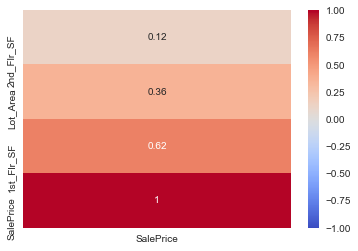

In [12]:
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap='coolwarm')

In [36]:
featuresp = ['Lot_Area','1st_Flr_SF','2nd_Flr_SF','SalePrice']
#Xy = df_train[featuresp]

In [14]:
#poly = PolynomialFeatures(include_bias=False)
#X_poly = poly.fit_transform(Xy)

In [15]:
#newdf = pd.DataFrame(X_poly, columns=poly.get_feature_names(featuresp))
#newdf.head()

,Lot_Area,1st_Flr_SF,2nd_Flr_SF,SalePrice,Lot_Area^2,Lot_Area 1st_Flr_SF,Lot_Area 2nd_Flr_SF,Lot_Area SalePrice,1st_Flr_SF^2,1st_Flr_SF 2nd_Flr_SF,1st_Flr_SF SalePrice,2nd_Flr_SF^2,2nd_Flr_SF SalePrice,SalePrice^2
0,9.511703,6.586172,6.625392,11.779129,90.472502,62.645712,63.018767,112.039577,43.377657,43.635971,77.579362,43.895824,78.041348,138.747868
1,9.349406,6.816736,7.097549,12.301383,87.411400,63.732434,66.357869,115.010628,46.467888,48.382116,83.855278,50.375200,87.309666,151.324019
2,8.977399,6.963190,0.000000,11.599103,80.593692,62.511335,0.000000,104.129777,48.486015,0.000000,80.766759,0.000000,0.000000,134.539194
3,9.190342,6.612041,6.551080,12.066811,84.462381,60.766917,60.206667,110.898113,43.719087,43.316012,79.786247,42.916654,79.050645,145.607918
4,9.563459,6.722630,6.419995,11.838626,91.459748,64.291594,61.397358,113.218211,45.193751,43.159249,79.586697,41.216335,76.003916,140.153056


In [ ]:
#

In [35]:
#featurestest = ['Lot_Area','1st_Flr_SF','2nd_Flr_SF']
#Yx = df_test[featurestest]
#poly = PolynomialFeatures(include_bias=False)
#Y_poly = poly.fit_transform(Yx)
#newdftest = pd.DataFrame(Y_poly, columns=poly.get_feature_names(featurestest))
#newdftest.head()

In [17]:
#newdf.drop(columns=['Lot_Area SalePrice','1st_Flr_SF SalePrice','2nd_Flr_SF SalePrice',
         #           'SalePrice^2'],inplace=True
         # )

In [ ]:
#newdf.head()

In [ ]:
#mergdf = pd.merge(newdf, df_train, left_index=True, right_index=True, how='left')

In [ ]:
#mergdf.drop(columns=['1st_Flr_SF_x','2nd_Flr_SF_x'],inplace=True)
#mergdf.head()

In [ ]:
#mergedf.info()

In [ ]:
#merg = pd.get_dummies(mergdf,columns=['MS_SubClass','MS_Zoning','Neighborhood','Bldg_Type']
                           # ,drop_first=True)

In [ ]:
#merg.head()

In [20]:
X = df_train._get_numeric_data().drop(columns=['SalePrice']) # if my df only has numeric cols and my target
features = list(X.columns)
y = newdf['SalePrice']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [22]:
lr = LinearRegression()

In [23]:
cross_val_score(lr, X_train, y_train).mean()

0.6225903320615755

In [24]:
cross_val_score(lr, X_test, y_test).mean()

0.5884794058414133

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.6298967829450703, 0.5706758823384396)

In [31]:
X_TEST = df_test[['Lot_Area','1st_Flr_SF','2nd_Flr_SF',]]


In [34]:
lr.predict(X_TEST)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 3)